# Import Library

In [4]:
import tensorflow as tf
import keras
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
DATASET_PATH = "./Dataset/"

classes = os.listdir(DATASET_PATH)

X, y = [], []
counter = 0

for class_path in classes:
    for img_path in os.listdir(os.path.join(DATASET_PATH, class_path)):
        path = os.path.join(DATASET_PATH, class_path, img_path)

        image = tf.keras.utils.load_img(path, color_mode="grayscale")
        image = tf.keras.utils.img_to_array(image)

        X.append(image)
        y.append(counter)
    
    counter += 1

X = np.array(X)
y = np.array(y)

print("Dataset loaded successfully!")
print(f"Shape X: {X.shape}, Shape y: {y.shape}")

Dataset loaded successfully!
Shape X: (2000, 224, 224, 1), Shape y: (2000,)


In [ ]:
X = X.astype("float32") / 255.0

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=24)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=24)

y_train = keras.utils.to_categorical(y_train, num_classes=4)
y_test = keras.utils.to_categorical(y_test, num_classes=4)
y_val = keras.utils.to_categorical(y_val, num_classes=4)

In [8]:
img_rows, img_cols = X.shape[1:3]

# Modelling

In [9]:
model = keras.Sequential([
    keras.layers.Conv2D(8, (5, 5), activation="relu", input_shape=(img_rows, img_cols, 1)),
    keras.layers.MaxPooling2D((2, 2), 2),
    keras.layers.Conv2D(16, (3, 3), activation="relu"),
    keras.layers.Conv2D(16, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2), 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(4, activation="softmax")
])

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 8)       208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 16)      1168      
                                                                 
 conv2d_2 (Conv2D)           (None, 106, 106, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 44944)             0

# Train Model

In [11]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [12]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/10
50/50 [==============================] - 25s 492ms/step - loss: 1.3351 - accuracy: 0.3625 - val_loss: 1.2258 - val_accuracy: 0.4500
Epoch 2/10
50/50 [==============================] - 23s 448ms/step - loss: 1.0874 - accuracy: 0.6581 - val_loss: 0.9494 - val_accuracy: 0.6300
Epoch 3/10
50/50 [==============================] - 24s 476ms/step - loss: 0.8178 - accuracy: 0.7206 - val_loss: 0.7601 - val_accuracy: 0.7450
Epoch 4/10
50/50 [==============================] - 27s 550ms/step - loss: 0.6173 - accuracy: 0.7950 - val_loss: 0.5922 - val_accuracy: 0.7950
Epoch 5/10
50/50 [==============================] - 23s 469ms/step - loss: 0.4901 - accuracy: 0.8500 - val_loss: 0.5046 - val_accuracy: 0.8200
Epoch 6/10
50/50 [==============================] - 23s 462ms/step - loss: 0.4103 - accuracy: 0.8644 - val_loss: 0.4604 - val_accuracy: 0.8550
Epoch 7/10
50/50 [==============================] - 23s 453ms/step - loss: 0.3722 - accuracy: 0.8675 - val_loss: 0.4668 - val_accuracy: 0.8150

In [13]:
model.evaluate(X_train, y_train)

50/50 [==============================] - 5s 107ms/step - loss: 0.2438 - accuracy: 0.9144


[0.24381649494171143, 0.9143750071525574]

7/7 [==============================] - 1s 98ms/step


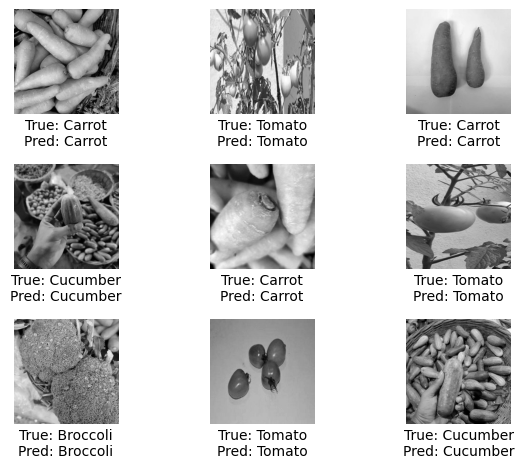

In [14]:
predictions = model.predict(X_test)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i], cmap="gray")
    plt.axis("off")
    plt.text(0.5, -0.15, f"True: {classes[true_labels[i]]}", ha="center", transform=plt.gca().transAxes)
    plt.text(0.5, -0.3, f"Pred: {classes[pred_labels[i]]}", ha="center", transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

# Plotting

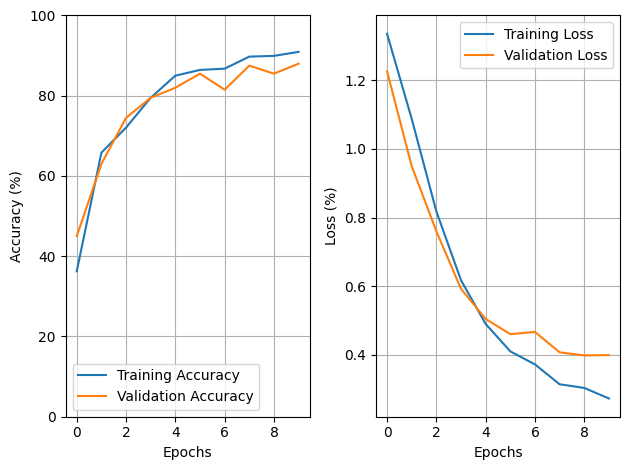

In [15]:
plt.subplot(1, 2, 1)
plt.plot([x * 100 for x in history.history["accuracy"]], label="Training Accuracy")
plt.plot([x * 100 for x in history.history["val_accuracy"]], label="Validation Accuracy")
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.ylim(bottom=0, top=100)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss (%)")
plt.legend()

plt.tight_layout()
plt.show()